### Quantum Speedup for Solving Linear Systems of Equations
One of the most compelling applications of quantum computing is its potential to solve linear systems of equations exponentially faster than classical computers. This capability is particularly useful in fields such as physics, engineering, and data science, where solving such systems is a common and computationally intensive task. The quantum algorithm designed for this purpose is the HHL algorithm, named after its creators Harrow, Hassidim, and Lloyd.

The HHL algorithm leverages the principles of quantum mechanics to offer an exponential speedup over the best-known classical algorithms. This is achieved through quantum phase estimation and amplitude amplification techniques. The algorithm is designed to solve the problem.

𝐴x=𝑏, where 𝐴 is a Hermitian matrix, and 𝑏 is a known vector.

This algorithm leverages quantum computing's potential to solve these systems more efficiently than classical algorithms. The process begins with the state preparation step, where the vector 𝑏 is encoded into a quantum state ∣𝑏⟩. This encoding forms the basis for subsequent quantum operations.

Next, the algorithm uses quantum phase estimation to find the eigenvalues and eigenvectors of matrix 𝐴. This involves constructing a quantum circuit that, when executed, produces an approximation of the eigenvalues in a superposition state. Quantum phase estimation is crucial as it allows the algorithm to work with the eigenvalues directly, which are needed for the next step.

Once the eigenvalues are obtained, the algorithm performs a rotation to apply the inverse of these eigenvalues. This step effectively transforms the system, enabling the extraction of the solution vector 𝑥 by manipulating the quantum state accordingly. The ability to apply the inverse of the eigenvalues is one of the unique advantages of quantum computing in this context.

Finally, the algorithm performs an uncomputation to revert any ancillary qubits used during the process, ensuring the final state remains as a valid quantum state representing the solution 
∣𝑥⟩.

 Measurement is then performed to extract useful information from the quantum state. Through these steps, the HHL algorithm showcases how quantum computing can tackle complex linear systems more efficiently, holding promise for advancements in fields requiring large-scale data processing and complex problem-solving.

##### Linear system to be solved
Ax = b

##### Eigenvalue decomposition of A
A = VDV^†

##### Quantum phase estimation
U = exp(iAt)

##### Eigenvalue amplification
G = (I - (1 - λ)P_0)

##### Final state preparation
|x> = V^\dagger G |b>


##### Equation for HHL Algorighm:

\begin{align*}
Ax &= b \\
A &= VDV^\dagger \\
U &= e^{iAt} \\
G &= (I - (1 - \lambda)P_0) \\
|x\rangle &= V^\dagger G |b\rangle
\end{align*}


In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import StatevectorSimulator  # Use StatevectorSimulator
from qiskit.circuit.library import HGate
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define the matrix A and vector b
A = np.array([[1, 1], [1, -1]])
b = np.array([1, 0])

In [3]:
# Normalize vector b and prepare the initial quantum state |b>
b_norm = np.linalg.norm(b)
b_normalized = b / b_norm

In [4]:
# Create a quantum circuit for state preparation
n_qubits = 3  # 1 for the eigenvalue estimation, 1 for the system, 1 ancillary
qc = QuantumCircuit(n_qubits)

In [5]:
# State preparation |b>
initial_state = b_normalized
qc.initialize(initial_state, 1)

In [6]:
# Eigenvalue estimation
qc.h(0)
qc.cp(2 * np.pi / 2, 0, 1)
qc.h(0)

In [7]:
# Controlled Unitary (for simplicity, using identity here; replace with actual U)
qc.cx(0, 2)

In [8]:
# Inversion and rotation
theta = 2 * np.arcsin(b_norm)
qc.append(HGate().control(2), [0, 1, 2])

In [9]:
# Measurement
qc.measure_all()

In [10]:
# Use the Statevector Simulator
simulator = StatevectorSimulator()

In [11]:
# Transpile and run the quantum circuit
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

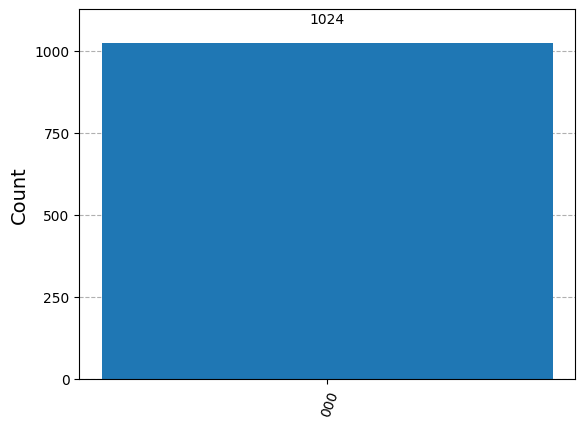

In [12]:
# Get counts and plot histogram
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)
plt.show()

In [13]:
# Transpile and simulate the circuit to get the statevector
qc.remove_final_measurements()  # Remove measurements for statevector simulation
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1, method='statevector')  # Specify method='statevector'
result = job.result()

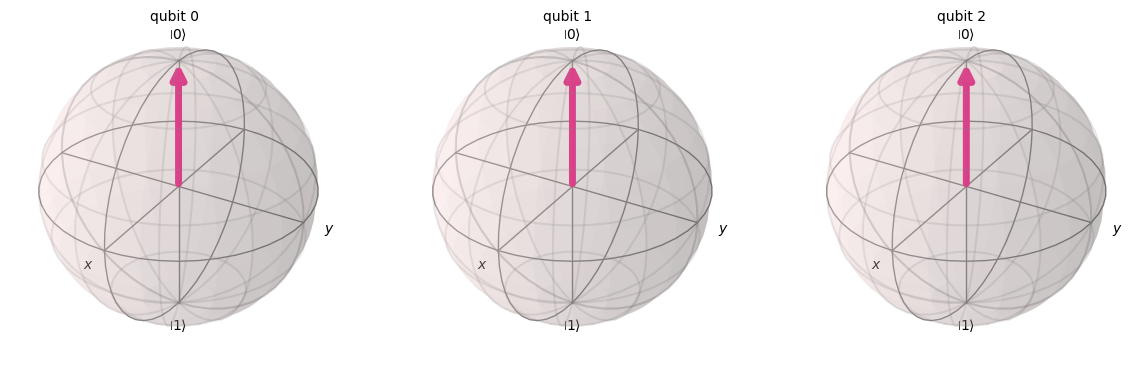

In [14]:
# Plot the Bloch vector of the resulting state
final_state = result.get_statevector(compiled_circuit)
plot_bloch_multivector(final_state)
plt.show()

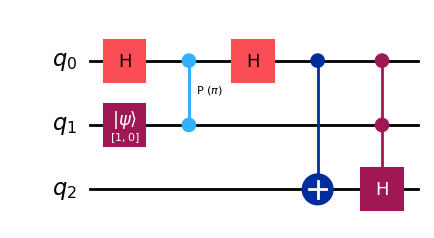

In [15]:
# Draw the quantum circuit
qc.draw('mpl')
plt.show()
